In [1]:
import torch
from torch import nn,optim
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt

In [ ]:
training_data=datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data=datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [4]:
train_loader=DataLoader(training_data,batch_size=64)
test_loader=DataLoader(test_data,batch_size=64)


In [5]:
for images,labels in train_loader:
    print(images.shape,labels.shape)
    break

torch.Size([64, 1, 28, 28]) torch.Size([64])


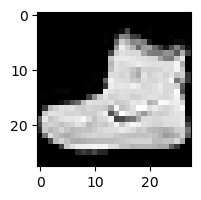

In [15]:
plt.figure(figsize=(2,2))
plt.imshow(images[0].squeeze(),cmap='gray')
plt.show()


In [16]:
labels[0]

tensor(9)

In [18]:
device=("cuda" if torch.cuda.is_available()
        else "mps" if torch.backends.mps.is_available
        else "cpu")
device

'cuda'

In [21]:
class ClothsClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.network=nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28,128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64,10)
        )
    def forward(self,x):
        return self.network(x)

In [44]:
model=ClothsClassifier().to(device)
# optimizer=optim.SGD(model.parameters(),lr=0.001,momentum=0.9)
optimizer=optim.Adam(model.parameters(),lr=0.001)

loss_fn=nn.CrossEntropyLoss()

In [45]:
epochs = 2

for epoch in range(epochs):  # Epoch loop
    for batch, (images, labels) in enumerate(train_loader):  # Batch loop
        # Move data to the specified device
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        pred = model(images)
        loss = loss_fn(pred, labels)

        # Backward pass
        loss.backward()

        # Weight update
        optimizer.step()
        optimizer.zero_grad()

        # Print progress
        if batch % 100 == 0:
            print(f"Epoch: {epoch + 1}, Batch: {batch}, Loss: {loss.item():.4f}")
#SGD without momentum 2.3==>2.02
#SGD with momentum 2.3==>0.65 
#adam 2.3==>0.49
#hence this is called optimisation


Epoch: 1, Batch: 0, Loss: 2.3205
Epoch: 1, Batch: 100, Loss: 0.7905
Epoch: 1, Batch: 200, Loss: 0.4833
Epoch: 1, Batch: 300, Loss: 0.6519
Epoch: 1, Batch: 400, Loss: 0.5180
Epoch: 1, Batch: 500, Loss: 0.4625
Epoch: 1, Batch: 600, Loss: 0.4218
Epoch: 1, Batch: 700, Loss: 0.6251
Epoch: 1, Batch: 800, Loss: 0.5697
Epoch: 1, Batch: 900, Loss: 0.4991
Epoch: 2, Batch: 0, Loss: 0.3276
Epoch: 2, Batch: 100, Loss: 0.4024
Epoch: 2, Batch: 200, Loss: 0.3200
Epoch: 2, Batch: 300, Loss: 0.4667
Epoch: 2, Batch: 400, Loss: 0.4507
Epoch: 2, Batch: 500, Loss: 0.3885
Epoch: 2, Batch: 600, Loss: 0.3587
Epoch: 2, Batch: 700, Loss: 0.5796
Epoch: 2, Batch: 800, Loss: 0.5149
Epoch: 2, Batch: 900, Loss: 0.4928


In [49]:
model.eval()

all_predicted=[]
all_labels=[]

with torch.no_grad():
    for images,labels in test_loader:
        images=images.to(device)
        labels=labels.to(device)
        
        outputs=model(images)
        
        _,predicted=torch.max(outputs.data,1)
        
        all_labels.extend(labels.cpu().numpy())
        all_predicted.extend(predicted.cpu().numpy())
        
        

In [47]:
import numpy

In [54]:
all_labels[:5]

[9, 2, 1, 1, 6]

In [57]:
all_predicted[:5]

[9, 2, 1, 1, 6]

In [60]:
from sklearn.metrics import classification_report
report=classification_report(all_labels,all_predicted)

In [59]:
print(report)

              precision    recall  f1-score   support

           0       0.78      0.84      0.81      1000
           1       0.95      0.97      0.96      1000
           2       0.85      0.60      0.70      1000
           3       0.84      0.88      0.86      1000
           4       0.65      0.88      0.75      1000
           5       0.95      0.93      0.94      1000
           6       0.72      0.52      0.61      1000
           7       0.88      0.96      0.92      1000
           8       0.91      0.98      0.94      1000
           9       0.98      0.91      0.94      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.84     10000
weighted avg       0.85      0.85      0.84     10000

